In [1]:
datastruct = struct('calibration', csvread('data/20160930_203718.csv', 1), ...
                    'validation_day01', csvread('data/20161001_231809.csv', 1), ...
                    'validation_day02', csvread('data/20161003_085624.csv', 1));

In [2]:
columns = {'Time', 'CO', 'Humidity', 'Temperature', ...
           'FlowRate', 'HeaterVoltage', 'R01', 'R02', ...
           'R03', 'R04', 'R05', 'R06', 'R07', ...
           'R08', 'R09', 'R10', 'R11', 'R12', ...
           'R13', 'R14'};
disp(columns(1));
disp(columns(20));

    'Time'

    'R14'



In [3]:
whos

  Name            Size                Bytes  Class     Attributes

  columns         1x20                 2416  cell                
  datastruct      1x1             141910128  struct              



In [4]:
datastruct


datastruct = 

  struct with fields:

         calibration: [295719x20 double]
    validation_day01: [295516x20 double]
    validation_day02: [295700x20 double]



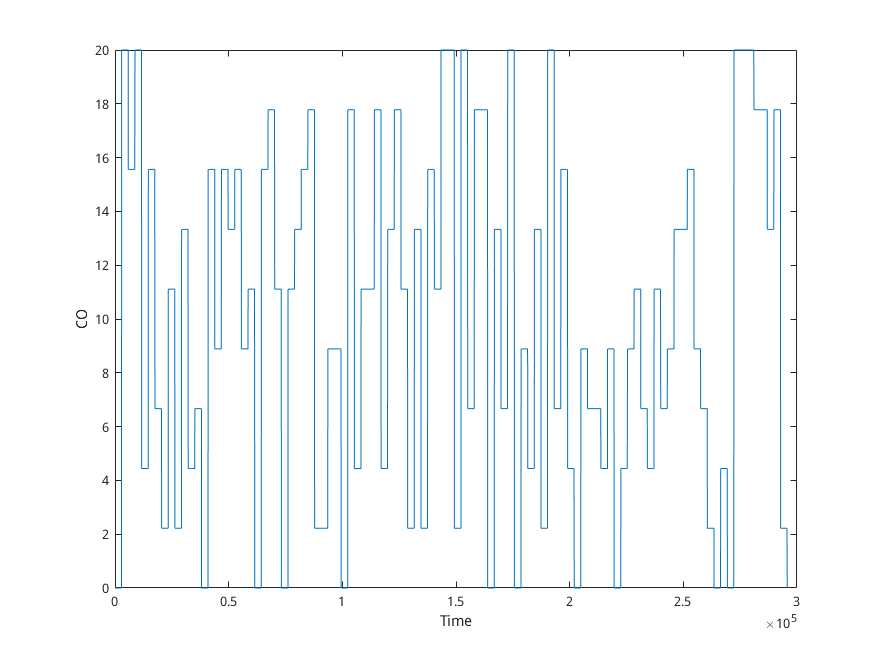

In [5]:
figure(1), clf
col = 2;
plot(datastruct.calibration(:,col))
xlabel('Time')
ylabel(columns(col))

### Projection to latent structure modelling


components =

    14



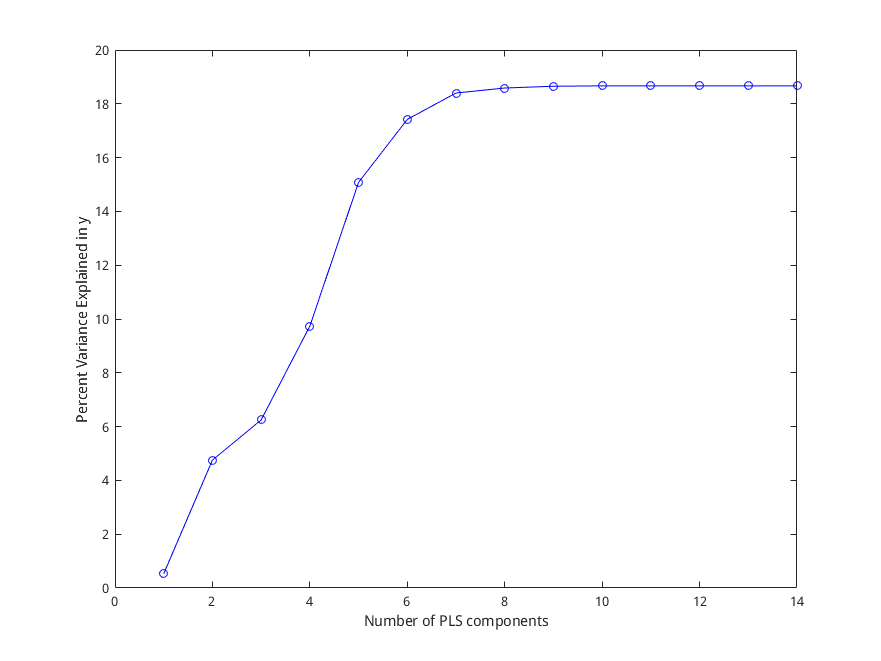

In [17]:
nsensors = 14;
startsensor = 7;
nsensors = nsensors - 1;
endsensor = startsensor + nsensors;
X = datastruct.calibration(:,startsensor:endsensor);
y = datastruct.calibration(:,1);
components = 14;
[XL,yl,XS,YS,beta,PCTVAR,MSE] = plsregress(X,y,components,'CV',7);

plot(1:components,cumsum(100*PCTVAR(2,:)),'-bo');
xlabel('Number of PLS components');
ylabel('Percent Variance Explained in y');

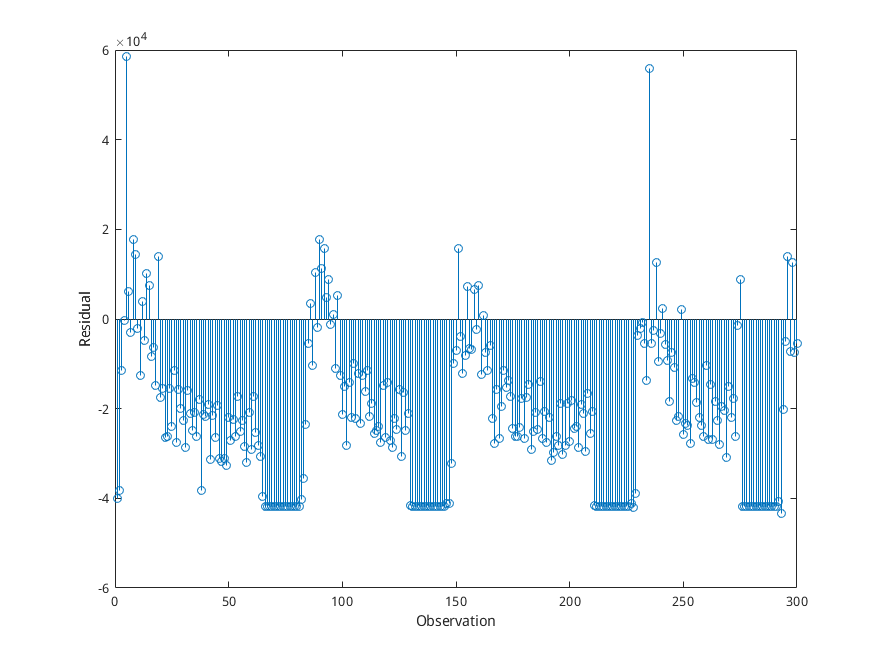

In [22]:
yfit = [ones(size(X,1),1) X]*beta;
residuals = y(1:300) - yfit(1:300);
stem(residuals)
xlabel('Observation');
ylabel('Residual');

In [19]:
MSE


MSE =

   1.0e+08 *

  Columns 1 through 7

    0.0001    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
    6.8866    6.8500    6.5662    6.3852    6.2160    5.8485    5.6874

  Columns 8 through 14

    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
    5.6199    5.6071    5.6026    5.6016    5.6016    5.6016    5.6016

  Column 15

    0.0000
    5.6016



In [42]:
X(1:5,:)
XL
yl


ans =

  Columns 1 through 7

    0.2231    0.6365    1.1493    0.8483    1.2534    1.4449    1.9906
    2.1314    5.3552    9.7569    6.3188    9.4472   10.5769   13.6317
   10.5318   22.5612   37.2635   17.7848   33.0704   36.3160   42.5746
   29.5749   49.5111   65.6318   26.1447   58.3847   67.5130   68.0064
   49.5111   67.0368   77.8317   27.9625   71.7732   79.9474   79.8631

  Columns 8 through 14

    1.3303    1.4480    1.9148    3.4651    5.2144    6.5806    8.6385
   21.9829   16.1902   24.2780   31.1014   34.7193   31.7505   41.9167
   49.7495   31.7533   57.7289   53.6275   56.9212   47.8255   62.9436
   59.2824   36.7821   66.0832   66.8349   66.9695   50.3730   64.8363
   62.5385   39.6271   68.1441   62.0947   49.4614   52.8453   66.8445


XL =

   1.0e+04 *

  Columns 1 through 7

    1.0304   -0.0908   -0.4231    0.4576   -0.0578    0.0437   -0.0909
    1.2132   -0.1445   -0.5530    0.5336   -0.0849    0.0607    0.0187
    1.3940   -0.0801   -0.5582    0.3805    0.0

In [ ]:
help plsregress

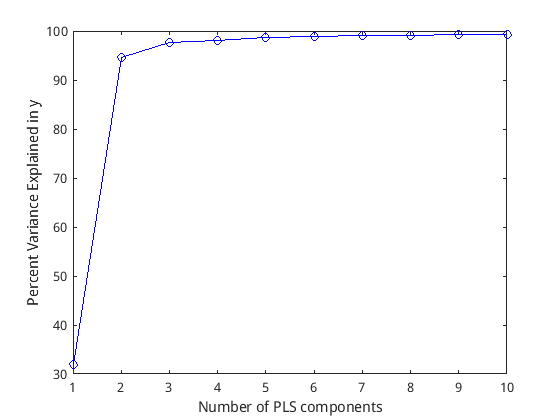

In [18]:
load spectra
X = NIR;
y = octane;

[XL,yl,XS,YS,beta,PCTVAR] = plsregress(X,y,10);

plot(1:10,cumsum(100*PCTVAR(2,:)),'-bo');
xlabel('Number of PLS components');
ylabel('Percent Variance Explained in y');

In [19]:
whos

  Name                  Size                 Bytes  Class      Attributes

  Description          11x72                  1584  char                 
  NIR                  60x401               192480  double               
  PCTVAR                2x10                   160  double               
  X                    60x401               192480  double               
  XL                  401x10                 32080  double               
  XS                   60x10                  4800  double               
  Y                295719x1                2365752  double               
  YL                    1x5                     40  double               
  YS                   60x10                  4800  double               
  beta                402x1                   3216  double               
  col                   1x1                      8  double               
  columns               1x20                  2416  cell                 
  datastruct            1x1          

In [24]:
X(1:1,:)


ans =

  Columns 1 through 7

   -0.0502   -0.0459   -0.0422   -0.0372   -0.0333   -0.0312   -0.0300

  Columns 8 through 14

   -0.0313   -0.0342   -0.0360   -0.0398   -0.0430   -0.0473   -0.0481

  Columns 15 through 21

   -0.0506   -0.0538   -0.0546   -0.0567   -0.0584   -0.0606   -0.0617

  Columns 22 through 28

   -0.0631   -0.0645   -0.0660   -0.0669   -0.0682   -0.0694   -0.0696

  Columns 29 through 35

   -0.0713   -0.0712   -0.0715   -0.0715   -0.0716   -0.0709   -0.0710

  Columns 36 through 42

   -0.0706   -0.0705   -0.0704   -0.0700   -0.0702   -0.0705   -0.0703

  Columns 43 through 49

   -0.0694   -0.0683   -0.0670   -0.0654   -0.0640   -0.0622   -0.0607

  Columns 50 through 56

   -0.0593   -0.0591   -0.0589   -0.0585   -0.0573   -0.0554   -0.0539

  Columns 57 through 63

   -0.0514   -0.0505   -0.0483   -0.0476   -0.0469   -0.0477   -0.0487

  Columns 64 through 70

   -0.0496   -0.0507   -0.0515   -0.0530   -0.0540   -0.0555   -0.0564

  Columns 71 through 77

